In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# Change font size to 12
plt.rcParams.update({'font.size': 12})
# Change font to Arial
plt.rcParams.update({'font.family': 'Arial'})

from ode_model import * 

In [2]:
p = default_parameters()

N_CAPS = p['Vcap']/p['kdcap']
# Initial conditions
initial_conditions = np.zeros(23)
initial_conditions[0] = N_CAPS # Number of CAPS 
initial_conditions[1] = 1 # Number of Virus

# Time points
t = np.linspace(0, 12, 1000)

# Solve ODE
sol = odeint(model, initial_conditions, t, args=(p,), rtol=1e-8)

In [3]:
N_CAPS

10000.0

In [4]:
# Species to index mapping
species = ['cap', 'Sv', 'Sc', 'Sv_Pol', 'Sc_Pol', 'Sv_Pol_Np', 'Sc_Pol_Np', 
            'MCRNA', 'MVRNA', 'MCRNA_Pol_Pol', 'MVRNA_Pol_Pol', 'mRNA_Pol', 
            'mRNA_NP', 'Pol', 'NP', 'Sv_c', 'MVRNA_Pol', 'MCRNA_Pol',
            'cappedMVRNA', 'cappedMCRNA', 'dsMVRNA', 'mRNA_NEP', 'NEP']

species = {s: i for i, s in enumerate(species)}

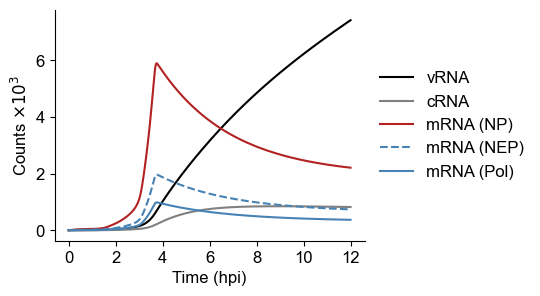

In [5]:
# Plot results
f, ax = plt.subplots(1, 1, figsize=(4,3)) 

#plt.plot(t, sol[:, species['cap']]/1000, label='CAP Pool', color='black', linestyle='--')

observable_vRNA = {'Sv':1, 'Sv_Pol':1, 'Sv_Pol_Np':1, 'Sv_c':1}
tota_vRNA = sum([sol[:, species[k]] for k in observable_vRNA.keys()])

plt.plot(t, tota_vRNA/1000, label='vRNA', color='black') 

observable_cRNA = {'Sc':1, 'Sc_Pol':1, 'Sc_Pol_Np':1, }
tota_cRNA = sum([sol[:, species[k]] for k in observable_cRNA.keys()])
plt.plot(t, tota_cRNA/1000, label='cRNA' , color='grey')


# Observable mRNA
plt.plot(t, sol[:, species['mRNA_NP']]/1000, label='mRNA (NP)', color='firebrick')
plt.plot(t, sol[:, species['mRNA_NEP']]/1000, label='mRNA (NEP)', color='steelblue', linestyle='--')
plt.plot(t, sol[:, species['mRNA_Pol']]/1000, label='mRNA (Pol)', color='steelblue')

sns.despine()

# Legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlabel('Time (hpi)')
plt.ylabel('Counts $\\times 10^3$')

# x-axis tick every 2h
plt.xticks(np.arange(0, 13, 2))
# Y-axis ticks every 10 
plt.yticks([0,2,4,6])
# Write model to svg 
plt.savefig('figures/fig1.svg', bbox_inches='tight')

In [6]:
# Show the 

In [7]:
p = default_parameters()

# Time points
t = np.linspace(0, 12, 1000)

# Solve ODE
sol_37 = odeint(model, initial_conditions, t, args=(p,), rtol=1e-8)

p['kt_pol'] = p['kt_pol'] * 0.8
p['kt_nep'] = p['kt_nep'] * 0.4
p['kt_np'] = p['kt_np'] * 0.4


p['T'] = 273.15 + 39
# SOlve ODE
sol_39 = odeint(model, initial_conditions, t, args=(p,), rtol=1e-8)

# Labels 
T37 = 'T=37$^{\circ}$C'
T39 = 'T=39$^{\circ}$C'


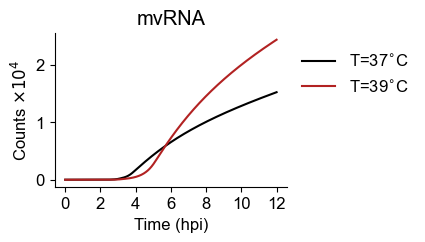

In [8]:
# Aberant products 
f, ax = plt.subplots(1, 1, figsize=(3,2))

# Total MINIVIRAL RNA
observable_NP = {'MVRNA': 1, 'MVRNA_Pol_Pol': 1, 'MVRNA_Pol': 1, }

tota_MVRNA_37 = sum([sol_37[:, species[k]] for k in observable_NP.keys()])
tota_MVRNA_39 = sum([sol_39[:, species[k]] for k in observable_NP.keys()])

plt.plot(t, tota_MVRNA_37*1e-4, label=T37, color='black')
plt.plot(t, tota_MVRNA_39*1e-4, label=T39 , color='firebrick')

# Legend outside the plot
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlabel('Time (hpi)')
plt.ylabel('Counts $\\times 10^4$')
sns.despine()
plt.title('mvRNA')
#plt.yscale('log')

# x-axis tick every 2h
plt.xticks(np.arange(0, 13, 2))

# Write model to svg
plt.savefig('figures/fig1_mvRNA.svg', bbox_inches='tight')


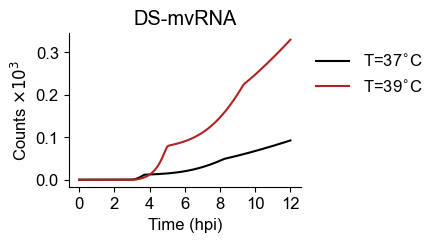

In [9]:
# Aberant products 
f, ax = plt.subplots(1, 1, figsize=(3,2))

plt.plot(t, sol_37[:, species['dsMVRNA']]/1e3, label=T37, color='black')
plt.plot(t, sol_39[:, species['dsMVRNA']]/1e3, label=T39 , color='firebrick')

# Legend outside the plot
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlabel('Time (hpi)')
plt.ylabel('Counts $\\times 10^3$')
sns.despine()
plt.title('DS-mvRNA')

#plt.yscale('log')

# x-axis tick every 2h
plt.xticks(np.arange(0, 13, 2))

# Write model to svg
plt.savefig('figures/fig1_DS_mvRNA.svg', bbox_inches='tight')


In [10]:
total_NP_37 = sum([sol_37[:,species[s]] *  v for s,v in observable_NP.items()])


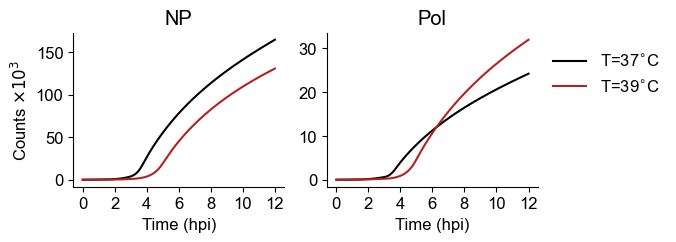

In [11]:
# NP vs Pol protein at 37 vs 37 
f, ax = plt.subplots(1, 2, figsize=(6,2))

observable_NP = { 'NP':1, 'Sv':20, 'Sc': 20, 'Sv_Pol': 20, 'Sc_Pol': 20, 'Sv_Pol_Np': 20, 'Sc_Pol_Np': 20, 'Sv_c': 20,}

total_NP_37 = sum([sol_37[:,species[s]] *  v for s,v in observable_NP.items()])
total_NP_39 = sum([sol_39[:,species[s]] *  v for s,v in observable_NP.items()])


ax[0].plot(t, total_NP_37/1e3, label=T37, color='black')
ax[0].plot(t, total_NP_39/1e3, label=T39 , color='firebrick')

ax[0].set_xlabel('Time (hpi)')
ax[0].set_ylabel('Counts $\\times 10^3$')

observable_pol = { 'Pol':1, 'Sv_Pol': 2, 'Sc_Pol': 2, 'Sv_Pol_Np': 2, 'Sc_Pol_Np': 2, 'MVRNA_Pol': 1, 
                  'MCRNA_Pol': 1, 'MVRNA_Pol_Pol': 1, 'MCRNA_Pol_Pol': 1, 'Sv':1, 'Sc':1, 'Sv_c':1}

total_pol_37 = sum([sol_37[:,species[s]] *  v for s,v in observable_pol.items()])
total_pol_39 = sum([sol_39[:,species[s]] *  v for s,v in observable_pol.items()])

ax[1].plot(t, total_pol_37/1e3, label=T37 , color='black')
ax[1].plot(t, total_pol_39/1e3, label=T39 , color='firebrick')

ax[1].set_xlabel('Time (hpi)')
#ax[1].set_ylabel('Counts $\\times 10^3$')

# Legend outside the plot
ax[1].legend(loc='lower left', bbox_to_anchor=(1, 0.5), frameon=False)

# Title 
ax[0].set_title('NP')
ax[1].set_title('Pol')

sns.despine()
# x-axis tick every 2h
ax[0].set_xticks(np.arange(0, 13, 2))
ax[1].set_xticks(np.arange(0, 13, 2))

# Save figure
plt.savefig('figures/fig1_NP_Pol.svg', bbox_inches='tight')


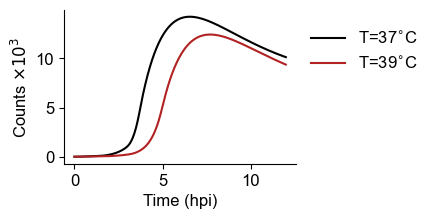

In [12]:
# NEP 
f, ax = plt.subplots(1, 1, figsize=(3,2))
plt.plot(t, sol_37[:, species['NEP']]/1e3, label=T37, color='black')
plt.plot(t, sol_39[:, species['NEP']]/1e3, label=T39 , color='firebrick')
# Legend outside the plot
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5), frameon=False)
plt.xlabel('Time (hpi)')
plt.ylabel('Counts $\\times 10^3$')
sns.despine()

Text(0.5, 1.0, 'NP mRNA')

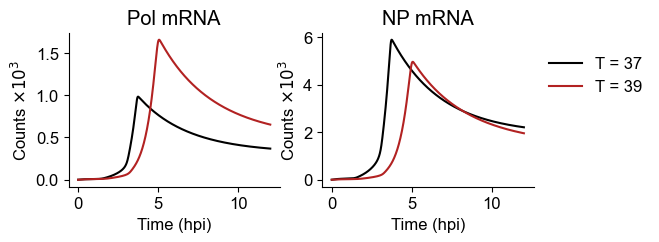

In [13]:
# Plot mRNA levels of pol and NP
f, ax = plt.subplots(1,2, figsize=(6,2))

ax[0].plot(t, sol_37[:, species['mRNA_Pol']]/1e3, label='T = 37', color='black')
ax[0].plot(t, sol_39[:, species['mRNA_Pol']]/1e3, label='T = 39', color='firebrick')

ax[1].plot(t, sol_37[:, species['mRNA_NP']]/1e3, label='T = 37', color='black')
ax[1].plot(t, sol_39[:, species['mRNA_NP']]/1e3, label='T = 39', color='firebrick')

sns.despine()

# Legend outside the plot
ax[1].legend(loc='lower left', bbox_to_anchor=(1, 0.5), frameon=False)

# Labels and titles 
ax[0].set_xlabel('Time (hpi)')
ax[0].set_ylabel('Counts $\\times 10^3$')
ax[0].set_title('Pol mRNA')

ax[1].set_xlabel('Time (hpi)')
ax[1].set_ylabel('Counts $\\times 10^3$')
ax[1].set_title('NP mRNA')


In [15]:
# Make a parameter sensitivity analysis by varying np vs pol transcription rates

def compute_peturbed_trace(t=np.linspace(0,8,100) ,**kwargs):
    p = default_parameters()
    for k, v in kwargs.items():
        p[k] = p[k] * v

    # Solve ODE
    sol = odeint(model, initial_conditions, t, args=(p,), rtol=1e-6)
    return sol


# dsMVRNA
obs_id = species['dsMVRNA']

# Make a meshgrid for the parameters
r_np_nep = np.linspace(0.1, 1.0, 50)
r_pol = np.linspace(0.1, 1.0, 50)

t=np.linspace(0,8,100)

R_NP, R_pol = np.meshgrid(r_np_nep, r_pol)

# Compute the 10 timepoint for each point in the meshgrid
perturbed_traces = np.zeros((len(r_np_nep), len(r_pol), len(species)))


for i in range(len(r_np_nep)):
    for j in range(len(r_pol)):
        this_r_np_nep = R_NP[i, j]
        this_r_pol = R_pol[i, j]
        perturbed_traces[i, j, :] = compute_peturbed_trace(t, kt_pol=this_r_pol, 
                                                           kt_np=this_r_np_nep, 
                                                           #kt_nep=this_r_np_nep
                                                           )[-1, :]


perturbed_traces

array([[[3.49672473e+03, 1.08747551e+02, 5.05228701e+01, ...,
         5.26734023e+01, 3.69282973e+03, 1.84398489e+04],
        [8.55330945e+02, 1.51193272e+02, 7.96697664e+01, ...,
         6.53378242e+01, 4.95540432e+03, 2.59571304e+04],
        [7.04177155e+01, 1.86553812e+02, 1.19346880e+02, ...,
         5.79105224e+01, 4.89362868e+03, 3.21943488e+04],
        ...,
        [7.18813017e+00, 6.11940813e+02, 7.39271617e+02, ...,
         2.17840000e+00, 1.12607027e+03, 1.54419358e+04],
        [6.95882503e+00, 6.23275545e+02, 7.45666701e+02, ...,
         2.07523354e+00, 1.10912446e+03, 1.52173811e+04],
        [6.74032063e+00, 6.34616849e+02, 7.51929135e+02, ...,
         1.97789771e+00, 1.09268005e+03, 1.49991832e+04]],

       [[3.31119754e+03, 1.09913241e+02, 5.15319739e+01, ...,
         6.70476786e+01, 3.74986508e+03, 1.88227374e+04],
        [6.99145155e+02, 1.52228234e+02, 8.12481135e+01, ...,
         8.19919728e+01, 4.96936844e+03, 2.63880609e+04],
        [6.84981776e+01, 

In [16]:
perturbed_traces.shape

(50, 50, 23)

In [17]:
# Time points
t = np.linspace(0, 8, 1000)

# Solve ODE
p = default_parameters()
sol = odeint(model, initial_conditions, t, args=(p,), rtol=1e-8)

/var/folders/n5/kq0k2frx06l30kyysqmgk1lw0000gn/T/ipykernel_45227/2100098643.py:21: UserWarning: The following kwargs were not used by contour: 'center'
  contour = ax.contourf(R_NP, R_pol, RIGI_ACTIVIY/REF_RIGI_ACTIVIY,  center=1,


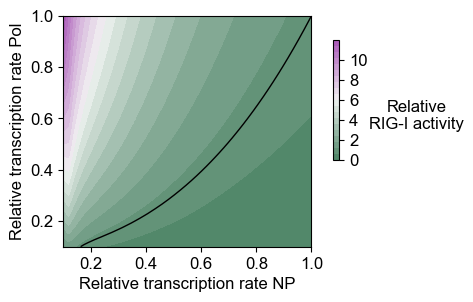

In [18]:
# Plot a countour plot of the perturbed traces
f, ax = plt.subplots(1, 1, figsize=(4,3))

cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

# Set x and y ticks to 0.2 intervals 0.2, 0.4 0.6, 0.8, 1.0
ax.set_xticks(np.arange(0, 1.1, 0.2))
ax.set_yticks(np.arange(0, 1.1, 0.2))



# RIG-I activation
NA = 6.022e23 # 1/mol
# Volume of A549 cytosol
V = 2385 * (1e-6)**3 * 0.7 * 1000
KD =  2.5e-9 * NA * V # 1/mol
REF_RIGI_ACTIVIY = sol[-1, obs_id] / ( sol[-1, obs_id] + KD)
RIGI_ACTIVIY = perturbed_traces[:, :, obs_id] / ( perturbed_traces[:, :, obs_id] + KD)

# Plot the contour plot
contour = ax.contourf(R_NP, R_pol, RIGI_ACTIVIY/REF_RIGI_ACTIVIY,  center=1, 
                      levels=20, cmap=cmap)

# Add a contour line at 1 
ax.contour(R_NP, R_pol, RIGI_ACTIVIY/REF_RIGI_ACTIVIY, levels=[1.0,], colors='black', linewidths=1.0)

# Add a colorbar
cbar = plt.colorbar(contour)
# Change location of colorbar to the top-right
cbar.ax.set_position([0.8, 0.4, 0.1, 0.4])
# Change colorbar ticks
cbar.ax.set_yticks([0,2,4,6,8,10])
# Change the rotation of the color-bar label
cbar.ax.tick_params(labelsize=12)
# Change colorbar label and rotate by 90 degrees and move it on top
cbar.ax.set_ylabel('Relative\nRIG-I activity', labelpad=35, rotation=0, fontsize=12, ha='center', va='top')


# Add labels
ax.set_xlabel('Relative transcription rate NP')
ax.set_ylabel('Relative transcription rate Pol')

# Save the figure
plt.savefig('figures/fig1_sensitivity.svg', bbox_inches='tight')

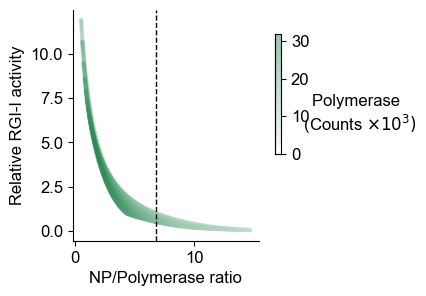

In [19]:
# Compute the relative change in NP/Pol abundance
observable_NP = { 'NP':1,  'Sv':20, 'Sc': 20, 'Sv_Pol': 20, 'Sc_Pol': 20, 'Sv_Pol_Np': 21, 'Sc_Pol_Np': 21, 'Sv_c': 20,}

observable_pol = { 'Pol':1, 'Sv_Pol': 2, 'Sc_Pol': 2, 'Sv_Pol_Np': 2, 'Sc_Pol_Np': 2, 'MVRNA_Pol': 1,
                  'MCRNA_Pol': 1, 'MVRNA_Pol_Pol': 2, 'MCRNA_Pol_Pol': 2, 'Sv':1, 'Sc':1, 'Sv_c':1}

total_NP = sum([perturbed_traces[:,:,species[s]] *  v for s,v in observable_NP.items()])
total_pol = sum([perturbed_traces[:,:,species[s]] *  v for s,v in observable_pol.items()])

total_virus = sum([perturbed_traces[:,:,species[s]] for s in ['Sv', 'Sc']])


np_pol_ratio = (total_NP / total_pol).flatten()
# Compute the relative change in dsMVRNA to Sv_c

dsMVRNA_ref = sol_37[-1, species['dsMVRNA']]

dsMRNA = perturbed_traces[:,:,obs_id].flatten() * 1e-3 # total_virus.flatten() 
f, ax = plt.subplots(1, 1, figsize=(3,3))

cmap = sns.light_palette("seagreen", as_cmap=True)
    

plt.scatter(np_pol_ratio, RIGI_ACTIVIY.flatten()/REF_RIGI_ACTIVIY, c=total_pol.flatten()/1e3, 
            cmap=cmap, s=5, alpha=0.5)

# Add a colorbar    
cbar = plt.colorbar()
# Change location of colorbar to the top-right
cbar.ax.set_position([0.8, 0.4, 0.1, 0.4])
# Change colorbar ticks
cbar.ax.set_yticks([0, 10,20,30])
# Change the rotation of the color-bar label
cbar.ax.tick_params(labelsize=12)
# Change colorbar label and rotate by 90 degrees and move it on top
cbar.ax.set_ylabel('Polymerase \n (Counts $\\times 10^{3})$', labelpad=35, 
                   rotation=0, fontsize=12, ha='center', va='top')

# Horizontal line at np_pol_rederence 
np_pol_reference = (total_NP_37[-1] / total_pol_37[-1])
plt.axvline(np_pol_reference, color='black', linestyle='--', linewidth=1.0)


plt.xlabel('NP/Polymerase ratio') 
#plt.ylabel('Double-stranded mvRNA \n (Counts $\\times 10^3$)')
plt.ylabel('Relative RGI-I activity')
sns.despine()   

plt.savefig('figures/fig1_sensitivity_scatter.svg', bbox_inches='tight')

In [24]:
total_NP_37[-1] / total_pol_37[-1]

np.float64(6.800691255197513)

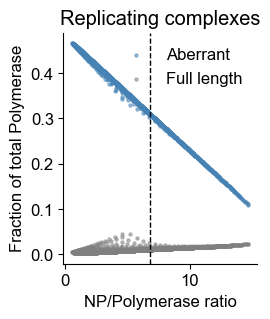

In [21]:
observable_mini_complex = { 'MVRNA_Pol': 1,  'MCRNA_Pol': 1, }
tota_mini_complex = sum([perturbed_traces[:,:,species[k]] *  v for k,v in observable_mini_complex.items()])

observable_full_replication = {"Sc_Pol_Np":1 , 'Sv_Pol_Np':1,}
total_observable_full_replication = sum([perturbed_traces[:,:,species[k]] *  v for k,v in observable_full_replication.items()])

observable_mini_replication = {"MVRNA_Pol_Pol":1 , 'MCRNA_Pol_Pol':1,}
total_mini_replication = sum([perturbed_traces[:,:,species[k]] *  v for k,v in observable_mini_replication.items()])

f, ax = plt.subplots(1, 1, figsize=(2.5,3))

#plt.scatter(np_pol_ratio, tota_mini_complex/total_pol, s=5, alpha=0.5, color='black')
plt.scatter(np_pol_ratio, total_mini_replication/total_pol, s=5, alpha=0.5, color='steelblue')
plt.scatter(np_pol_ratio, total_observable_full_replication/total_pol, s=5, alpha=0.5, color='grey')

# Add a colorbar
# Horizontal line at np_pol_rederence 
np_pol_reference = (total_NP_37[-1] / total_pol_37[-1])
plt.axvline(np_pol_reference, color='black', linestyle='--', linewidth=1.0)

#plt.xscale('log')
plt.xlabel('NP/Polymerase ratio') 
plt.ylabel('Fraction of total Polymerase')
sns.despine()   

#plt.ylim(0,0.3)

# Legend
plt.legend(['Aberrant', 'Full length'], 
           loc='upper right',frameon=False)

handles, labels = ax.get_legend_handles_labels()

# Make markers larger and opacity 10.
for i in range(len(handles)):
    handles[i].set_markersize(20)
    handles[i].set_alpha(1.0)
       
# Title 
plt.title('Replicating complexes')
plt.savefig('figures/fig1_sensitivity_scatter_replication.svg', bbox_inches='tight')


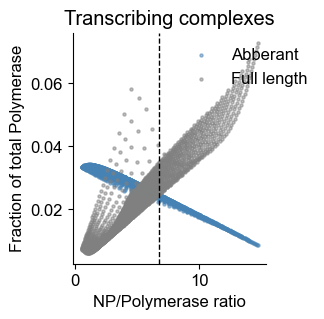

In [22]:
observable_mini_complex = { 'MVRNA_Pol': 1,  'MCRNA_Pol': 1, }
tota_mini_complex = sum([perturbed_traces[:,:,species[k]] *  v for k,v in observable_mini_complex.items()])

observable_full_complex = { 'Sv': 1,  }
tota_observable_full_complex = sum([perturbed_traces[:,:,species[k]] *  v for k,v in observable_full_complex.items()])


f, ax = plt.subplots(1, 1, figsize=(2.5,3))

plt.scatter(np_pol_ratio, tota_mini_complex/total_pol, s=5, alpha=0.5, color='steelblue')
plt.scatter(np_pol_ratio, tota_observable_full_complex/total_pol, s=5, alpha=0.5, color='grey')

# Add a colorbar
# Horizontal line at np_pol_rederence 
np_pol_reference = (total_NP_37[-1] / total_pol_37[-1])
plt.axvline(np_pol_reference, color='black', linestyle='--', linewidth=1.0)

# Legend
plt.legend(['Abberant', 'Full length'], 
           loc='upper left', bbox_to_anchor=(0.5, 1), frameon=False)

handles, labels = ax.get_legend_handles_labels()

# Make markers larger and opacity 10.
for i in range(len(handles)):
    handles[i].set_markersize(20)
    handles[i].set_alpha(1.0)

#plt.xscale('log')
plt.xlabel('NP/Polymerase ratio') 
plt.ylabel('Fraction of total Polymerase')
sns.despine()   
       
# Title
plt.title('Transcribing complexes')
plt.savefig('figures/fig1_sensitivity_scatter_transcription.svg', bbox_inches='tight')